In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,y_train.shape

((182, 11), (182,))

In [17]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


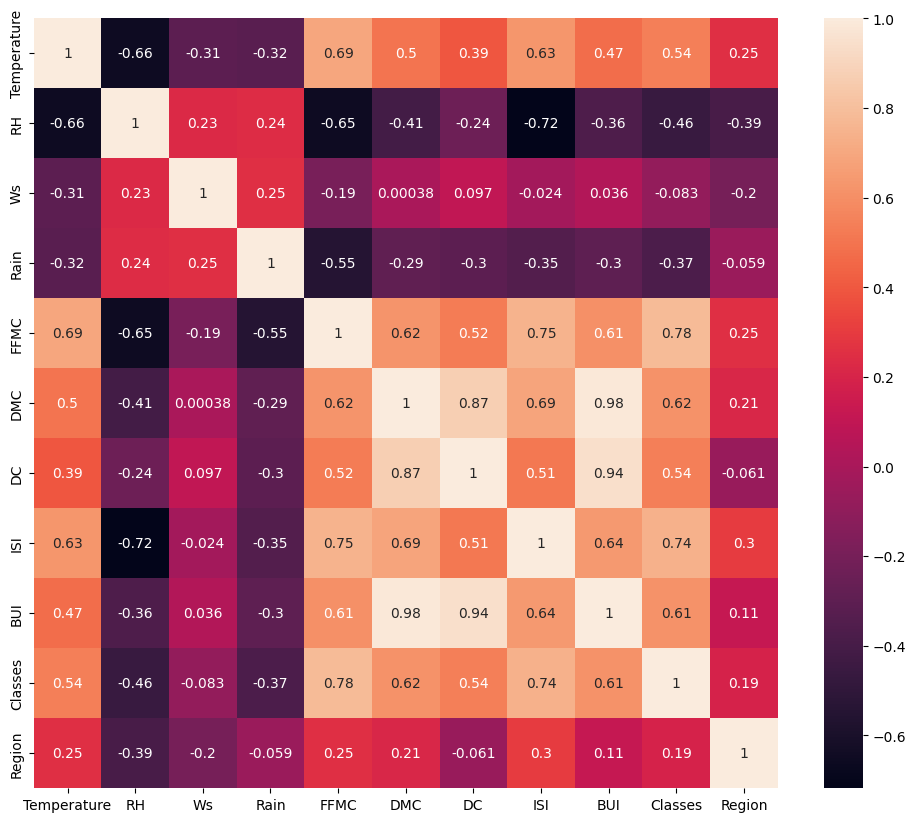

In [19]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [26]:
def correlation(dataset,threshhold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshhold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

In [27]:
correlation(X_train,0.85)

{'BUI', 'DC'}

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

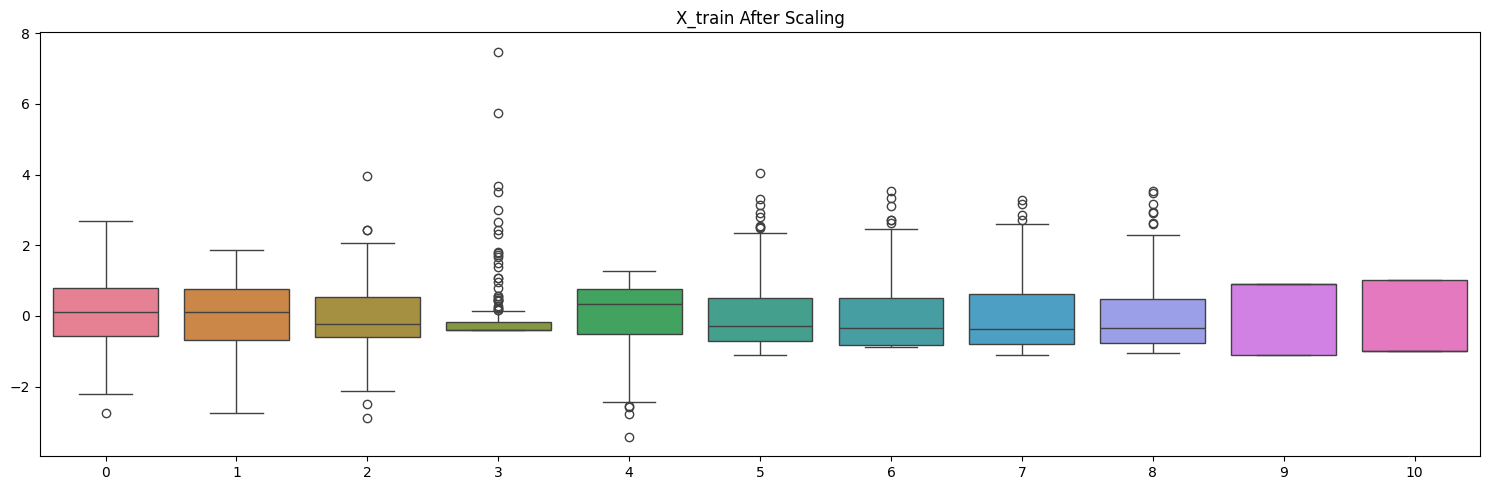

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=X_train)
plt.title('X_train After Scaling')
plt.tight_layout()  # Optional to adjust the spacing between plots
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression

In [34]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred=regression.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [40]:
mae=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

Mean absolute error 0.469824357168851
R2 Score 0.9893850294922101


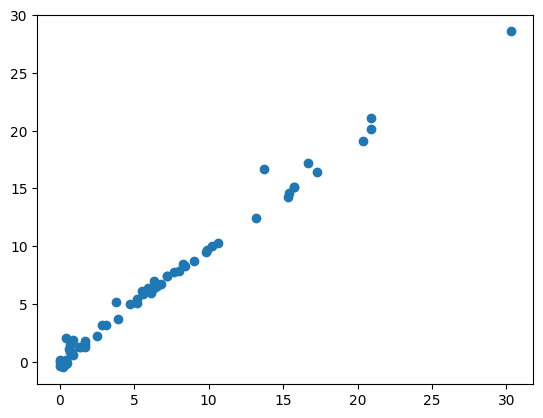

In [41]:
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 2.000058348289227
R2 Score 0.9548117077009715


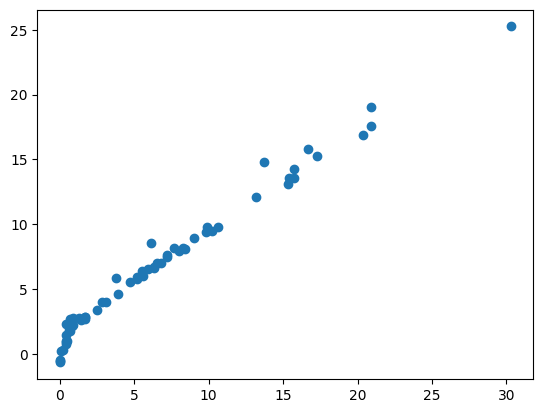

In [43]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
mae=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 2.000058348289227
R2 Score 0.9548117077009715


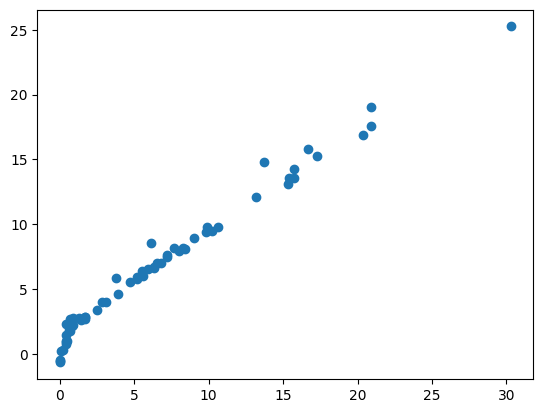

In [45]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
mae=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 0.50897722747648
R2 Score 0.9885004296257509


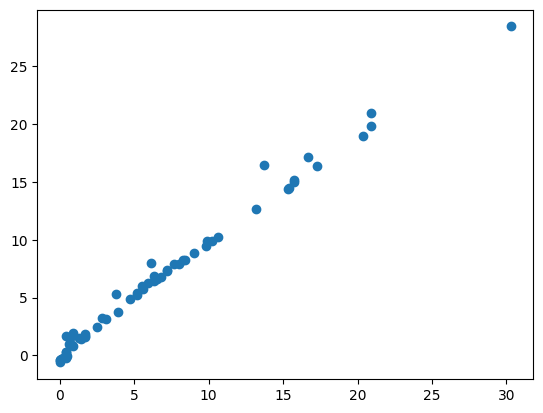

In [68]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=20)
lassocv.fit(X_train,y_train)
y_pred=lassocv.predict(X_test)
mae=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

In [47]:
lassocv.alpha_

np.float64(0.053395191056015395)

In [48]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

Mean absolute error 0.5677317795293473
R2 Score 0.987172959417527


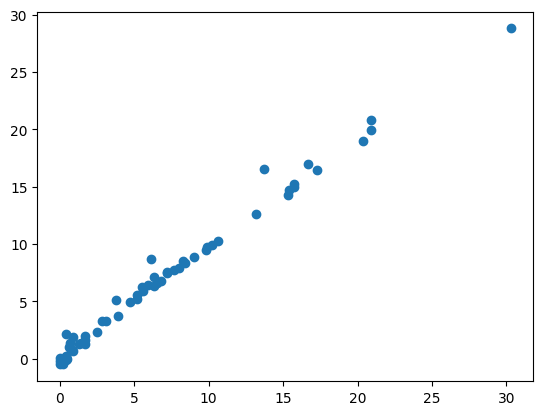

In [53]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
mae=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 0.5677317795293473
R2 Score 0.987172959417527


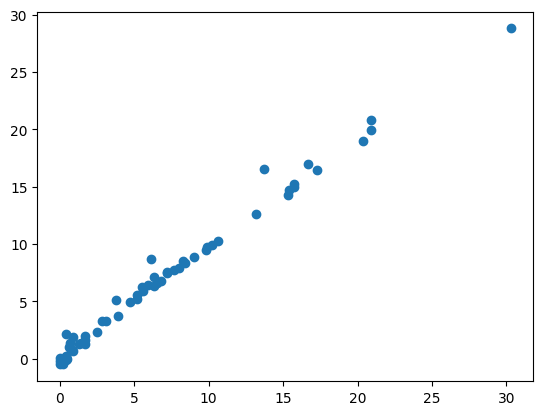

In [66]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=15)
ridgecv.fit(X_train,y_train)
y_pred=ridgecv.predict(X_test)
mae=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

In [56]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Mean absolute error 4.396320516000338
R2 Score 0.900671789556956


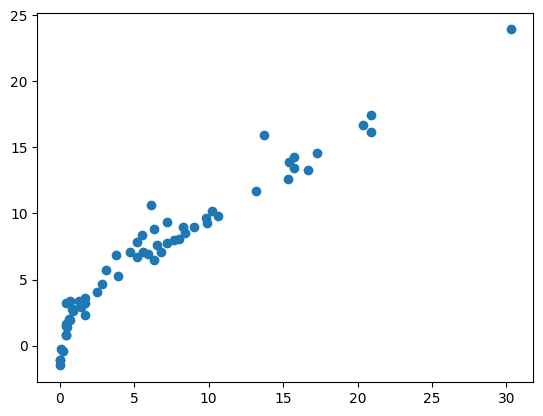

In [57]:
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(X_train,y_train)
y_pred=elasticnet.predict(X_test)
mae=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 0.6174054697144679
R2 Score 0.9860506575438959


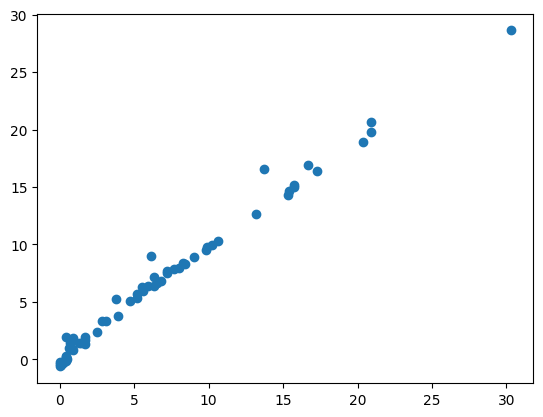

In [63]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=20)
elasticnetcv.fit(X_train,y_train)
y_pred=elasticnetcv.predict(X_test)
mae=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

In [70]:
#pickle the machine learning ,pickle preprocessing models
scaler

StandardScaler()

In [72]:
ridgecv

RidgeCV(cv=15)

In [73]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgecv,open('ridgecv.pkl','wb'))